In [5]:
import rebound
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '../src')
import tools 
import rebound
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import prop_elem


objtype = 'DES_objects'
objname = '2012 TC324'
objtype = 'TNOs'
objname = '2013 RP98'
objname = '55637'
#objname = '2001 QA298'
#objname = '2000 OB51'
objname = '136108'
#objname = '2013 JO65'

objtype = 'Single'
#objname='Haumea'
objname='156'

objtype = 'Asteroids1000'
objname='930' #Saturn dominated, clean frequency space
objname='759' #Saturn dominated, clean frequency space
#objname='626' #Saturn dominated, clean frequency space
#objname='512' #Saturn domnated, super messy frequency space
#objname='156'
#objname='582'


objtype = 'NesvornyAsthalf1'
objname='1905' #Not fliterng Ypq[0] works better
objname='1938' #Ypq[0] is 75% of power of Ypq[sind]. Long term features visible, in this case a periodic feature with a 24 mllion year period.
objname='1563' #
objname='1610' #
objname='1661' #
objname='1666' #
#objname='1667' #
#objname='277' #Not filterng Ypq[0] is bad, g is higher than ind 0. Long term features not visible in either case. 
#objtype = 'NesvornyAsthalf2'
#objname='9987' #Saturn dominated, clean frequency space

#objtype = 'TNOs_back'
#objname='136108' #Saturn dominated, clean frequency space

file = '../data/'+objtype+'/'+objname
sim = rebound.Simulationarchive(file + "/archive.bin")
#rot = rebound.Rotation.to_new_axes(newz=sim[0].angular_momentum())
#sim.rotate(rot)
dt = abs(sim[1].t)
n = len(sim)
if n < 10001:
    print(n)
freq = np.fft.rfftfreq(n,d=dt)
freqn = np.fft.fftfreq(n,d=dt)

#freq = np.flip(freq)
#freqn = np.flip(freqn)
#print(dt,np.log10(freq),np.log10(dt*1.5))

fullfile = file + "/archive.bin"
#flag, a_init, e_init, inc_init, lan_init, aop_init, M_init, t_init = tools.read_sa_for_sbody(sbody = str(objname), archivefile=fullfile,nclones=0,tmin=0,tmax=(sim[-1].t))
flag, a_init, e_init, inc_init, lan_init, aop_init, M_init, t_init = tools.read_sa_for_sbody(sbody = str(objname), archivefile=fullfile,nclones=0,tmin=(sim[-1].t),tmax=0)
print('time',t_init)

flag, av_init, ev_init, incv_init, lanv_init, aopv_init, Mv_init, t_init = tools.read_sa_for_sbody(sbody = str('venus'), archivefile=fullfile,nclones=0,tmin=(sim[-1].t),tmax=0)
flag, ae_init, ee_init, ince_init, lane_init, aope_init, Me_init, t_init = tools.read_sa_for_sbody(sbody = str('earth'), archivefile=fullfile,nclones=0,tmin=(sim[-1].t),tmax=0)
flag, am_init, em_init, incm_init, lanm_init, aopm_init, Mm_init, t_init = tools.read_sa_for_sbody(sbody = str('mars'), archivefile=fullfile,nclones=0,tmin=(sim[-1].t),tmax=0)
flag, aj_init, ej_init, incj_init, lanj_init, aopj_init, Mj_init, t_init = tools.read_sa_for_sbody(sbody = str('jupiter'), archivefile=fullfile,nclones=0,tmin=(sim[-1].t),tmax=0)
flag, as_init, es_init, incs_init, lans_init, aops_init, Ms_init, t_init = tools.read_sa_for_sbody(sbody = str('saturn'), archivefile=fullfile,nclones=0,tmin=(sim[-1].t),tmax=0)
flag, au_init, eu_init, incu_init, lanu_init, aopu_init, Mu_init, t_init = tools.read_sa_for_sbody(sbody = str('uranus'), archivefile=fullfile,nclones=0,tmin=(sim[-1].t),tmax=0)
flag, an_init, en_init, incn_init, lann_init, aopn_init, Mn_init, t_init = tools.read_sa_for_sbody(sbody = str('neptune'), archivefile=fullfile,nclones=0,tmin=(sim[-1].t),tmax=0)

hv = ev_init*np.sin(lanv_init+aopv_init)
he = ee_init*np.sin(lane_init+aope_init)
hm = em_init*np.sin(lanm_init+aopm_init)

hj = ej_init*np.sin(lanj_init+aopj_init)
hs = es_init*np.sin(lans_init+aops_init)
hu = eu_init*np.sin(lanu_init+aopu_init)
hn = en_init*np.sin(lann_init+aopn_init)

kv = ev_init*np.cos(lanv_init+aopv_init)
ke = ee_init*np.cos(lane_init+aope_init)
km = em_init*np.cos(lanm_init+aopm_init)

kj = ej_init*np.cos(lanj_init+aopj_init)
ks = es_init*np.cos(lans_init+aops_init)
ku = eu_init*np.cos(lanu_init+aopu_init)
kn = en_init*np.cos(lann_init+aopn_init)

pv = np.sin(incv_init)*np.sin(lanv_init)
pe = np.sin(ince_init)*np.sin(lane_init)
pm = np.sin(incm_init)*np.sin(lanm_init)

pj = np.sin(incj_init)*np.sin(lanj_init)
ps = np.sin(incs_init)*np.sin(lans_init)
pu = np.sin(incu_init)*np.sin(lanu_init)
pn = np.sin(incn_init)*np.sin(lann_init)

qv = np.sin(incv_init)*np.cos(lanv_init)
qe = np.sin(ince_init)*np.cos(lane_init)
qm = np.sin(incm_init)*np.cos(lanm_init)

qj = np.sin(incj_init)*np.cos(lanj_init)
qs = np.sin(incs_init)*np.cos(lans_init)
qu = np.sin(incu_init)*np.cos(lanu_init)
qn = np.sin(incn_init)*np.cos(lann_init)

h_init = (e_init)*np.sin(lan_init+aop_init)
k_init = (e_init)*np.cos(lan_init+aop_init)
p_init = np.sin(inc_init)*np.sin(lan_init)
q_init = np.sin(inc_init)*np.cos(lan_init)

Ya= np.fft.rfft(a_init)
Yh= np.fft.rfft(h_init)
Yk = np.fft.rfft(k_init)
Yp= np.fft.rfft(p_init)
Yq = np.fft.rfft(q_init)

Yhk = np.fft.fft(k_init+1j*h_init)
Ypq = np.fft.fft(q_init+1j*p_init)

Yhk_f = Yhk.copy()
Ypq_f = Ypq.copy()

freqind = np.where(freqn < 0)[0][0]
#Ypq_f[0] = np.mean([Ypq_f[1],Ypq_f[freqind]])
print(Ypq_f[0])
#Ypq_f[1] = 0
#Ypq_f[freqind] = 0

gind = np.argmax(np.abs(Yhk[1:])**2)+1    
sind = np.argmax(np.abs(Ypq[1:])**2)+1
g = freqn[gind]  
s = freqn[sind]  

spr = 1
#print(gind,g,freq[gind-spr],freq[gind+spr],1/(freq[gind+spr]-freq[gind-spr])/dt,1/(freq[gind+spr]-freq[gind-spr]))
#s = freq[sind]

freq_dist_lim = 2
#while int(1/(freqn[gind+freq_dist_lim]-freqn[gind-freq_dist_lim])/dt) > 2500:
#    freq_dist_lim = freq_dist_lim+1
    

Ya_f = Ya.copy()
Yp_f = Yp.copy()
Yq_f = Yq.copy()
Yh_f = Yh.copy()
Yk_f = Yk.copy()


rev=1296000    


Yhkv = np.fft.fft(kv+1j*hv)
Yhke = np.fft.fft(ke+1j*he)
Yhkm = np.fft.fft(km+1j*hm)

Yhkj = np.fft.fft(kj+1j*hj)
Yhks = np.fft.fft(ks+1j*hs)
Yhku = np.fft.fft(ku+1j*hu)
Yhkn = np.fft.fft(kn+1j*hn)

Ypqv = np.fft.fft(qv+1j*pv)
Ypqe = np.fft.fft(qe+1j*pe)
Ypqm = np.fft.fft(qm+1j*pm)

Ypqj = np.fft.fft(qj+1j*pj)
Ypqs = np.fft.fft(qs+1j*ps)
Ypqu = np.fft.fft(qu+1j*pu)
Ypqn = np.fft.fft(qn+1j*pn)

g_arr = []
s_arr = []

g5 = freqn[np.argmax(np.abs(Yhkj[1:])**2)+1]
g_arr.append(g5)
while freqn[np.argmax(np.abs(Yhks[1:])**2)+1] in g_arr:
    Yhks[np.argmax(np.abs(Yhks[1:])**2)+1] = 0
g6 = freqn[np.argmax(np.abs(Yhks[1:])**2)+1]
g_arr.append(g6)
while freqn[np.argmax(np.abs(Yhku[1:])**2)+1] in g_arr:
    Yhku[np.argmax(np.abs(Yhku[1:])**2)+1] = 0
g7 = freqn[np.argmax(np.abs(Yhku[1:])**2)+1]
g_arr.append(g7)
while freqn[np.argmax(np.abs(Yhkn[1:])**2)+1] in g_arr:
    Yhkn[np.argmax(np.abs(Yhkn[1:])**2)+1] = 0
g8 = freqn[np.argmax(np.abs(Yhkn[1:])**2)+1]
g_arr.append(g8)

while freqn[np.argmax(np.abs(Yhke[1:])**2)+1] in g_arr:
    Yhke[np.argmax(np.abs(Yhke[1:])**2)+1] = 0
g3 = freqn[np.argmax(np.abs(Yhke[1:])**2)+1]
g_arr.append(g3)
while freqn[np.argmax(np.abs(Yhkv[1:])**2)+1] in g_arr:
    Yhkv[np.argmax(np.abs(Yhkv[1:])**2)+1] = 0
g2 = freqn[np.argmax(np.abs(Yhkv[1:])**2)+1]
g_arr.append(g2)
while freqn[np.argmax(np.abs(Yhkm[1:])**2)+1] in g_arr:
    Yhkm[np.argmax(np.abs(Yhkm[1:])**2)+1] = 0
g4 = freqn[np.argmax(np.abs(Yhkm[1:])**2)+1]
g_arr.append(g4)


s6 = freqn[np.argmax(np.abs(Ypqs[1:])**2)+1]
s_arr.append(g6)
while freqn[np.argmax(np.abs(Ypqu[1:])**2)+1] in s_arr:
    Ypqu[np.argmax(np.abs(Ypqu[1:])**2)+1] = 0
s7 = freqn[np.argmax(np.abs(Ypqu[1:])**2)+1]
s_arr.append(s7)
while freqn[np.argmax(np.abs(Ypqn[1:])**2)+1] in s_arr:
    Ypqn[np.argmax(np.abs(Ypqn[1:])**2)+1] = 0
s8 = freqn[np.argmax(np.abs(Ypqn[1:])**2)+1]
s_arr.append(s8)

while freqn[np.argmax(np.abs(Ypqe[1:])**2)+1] in s_arr:
    Ypqe[np.argmax(np.abs(Ypqe[1:])**2)+1] = 0
s3 = freqn[np.argmax(np.abs(Ypqe[1:])**2)+1]
s_arr.append(s3)
while freqn[np.argmax(np.abs(Ypqv[1:])**2)+1] in s_arr:
    Ypqv[np.argmax(np.abs(Ypqv[1:])**2)+1] = 0
s2 = freqn[np.argmax(np.abs(Ypqv[1:])**2)+1]
s_arr.append(s2)
while freqn[np.argmax(np.abs(Ypqm[1:])**2)+1] in s_arr:
    Ypqm[np.argmax(np.abs(Ypqm[1:])**2)+1] = 0
s4 = freqn[np.argmax(np.abs(Ypqm[1:])**2)+1]
s_arr.append(s4)


    #print(g,s,g6,s6)
z1 = (g+s-g6-s6)
z2 = (g+s-g5-s7)
z3 = (g+s-g5-s6)

z4 = (g-2*g6+g5)
z5 = (g-2*g6+g7)
z6 = (s-s6-g5+g6)
z7 = (g-3*g6+2*g5)

z8 = (2*(g-g6)+s-s6)
z9 = (3*(g-g6)+s-s6)
z10 = ((g-g6)+s-s6)

z11 = g-2*g7+g6
z12 = 2*g-2*g5
z13 = -4*g+4*g7
z14 = -2*s-s6

    #print(g,s,g6,s6)
z1 = (g+s-g6-s6)
z2 = (g+s-g5-s7)
z3 = (g+s-g5-s6)
z4 = (2*g6-g5)
z5 = (2*g6-g7)
z6 = (s-s6-g5+g6)
z7 = (g-3*g6+2*g5)
    
z8 = (2*(g-g6)+s-s6)
z9 = (3*(g-g6)+s-s6)
z10 = ((g-g6)+s-s6)

z11 = g-2*g7+g6
z12 = 2*g-2*g5
z13 = -4*g+4*g7
z14 = -2*s-s6

freqlim=1/2000
small_planets_flag = True

if small_planets_flag:
    #freq1 = [(g1),(g2),(g3),(g4),(g5),(g6),(g7),(g8),z1,z2,z3,z4,z5,z7,z8,z9,g-z8,g-z9,g-z10,z11,z12,z13]
    #freq2 = [(s1),(s2),(s3),(s4),(s6),(s7),(s8),z1,z2,z3,z6,z8,z9,s-z8,s-z9,s-z10,z14]
    freq1 = [(g2),(g3),(g4),(g5),(g6),(g7),(g8),g-z8,g-z9,g-z10,z11,z12,z13,-g+2*s-g5]
    freq2 = [(s2),(s3),(s4),(s6),(s7),(s8),s-z8,s-z9,s-z10,z14,g-s+g5-s7,g+g5-2*s6,2*g-2*s6]
else:
    freq1 = [(g5),(g6),(g7),(g8),z1,z2,z3,z4,z5,z7,g-z8,g-z9,g-z10,z11,z12,z13]
    freq2 = [(s6),(s7),(s8),z1,z2,z3,z6,z8,z9,s-z8,s-z9,s-z10,z14]
#else:
#    freq1 = [(g5),(g6),(g7),(g8),z1,z2,z3,z4,z5,z7,z8,z9]
#    freq2 = [(s6),(s7),(s8),z1,z2,z3,z6,z8,z9]

secresind1 = []
secresind2 = []
for i in freq1:
    try:
        secresind1.append((np.abs(freqn - i)).argmin())
    except:
        continue
for i in freq2:
    try:
        secresind2.append((np.abs(freqn - i)).argmin())
    except:
        continue
#freq1.extend(de)
#freq2.extend(de)
#print(secresind2)
spread = 1
#while int(1/(freqn[gind+spread]-freqn[gind-spread])/dt) > 2500:
#    spread = spread+1
      
#while int(1/(freqn[gind+spread]-freqn[gind-spread])/dt) > 2500:
#    spread = spread+1
    
#freq_dist_lim = 1
#while int(1/(freqn[gind+freq_dist_lim]-freqn[gind-freq_dist_lim])/dt) > 1250:
#    freq_dist_lim = freq_dist_lim+1
        
spreads = np.ones(len(secresind1)+len(secresind2))
spreads = spreads.astype(int)
freq_dist_lims = np.zeros(len(secresind1)+len(secresind2))
freq_dist_lims = freq_dist_lims.astype(int)

for i in range(len(secresind1)): 
    if freqn[secresind1[i]] > 0:
        while ((freqn[secresind1[i]+spreads[i]]/freqn[secresind1[i]-spreads[i]])) < 1.05:
            spreads[i] = spreads[i]+1   
            if secresind1[i]+spreads[i] >= len(freqn):
                break
        while ((freqn[secresind1[i]+freq_dist_lims[i]]/freqn[secresind1[i]-freq_dist_lims[i]])) < 1.20:
            freq_dist_lims[i] = freq_dist_lims[i]+1
            if secresind1[i]+freq_dist_lims[i] >= len(freqn):
                break
    else:
        while ((freqn[secresind1[i]-spreads[i]]/freqn[secresind1[i]+spreads[i]])) < 1.05:
            spreads[i] = spreads[i]+1   
            if secresind1[i]+spreads[i] >= len(freqn):
                break               
        while ((freqn[secresind1[i]-freq_dist_lims[i]]/freqn[secresind1[i]+freq_dist_lims[i]])) < 1.20:
            freq_dist_lims[i] = freq_dist_lims[i]+1
            if secresind1[i]+freq_dist_lims[i] >= len(freqn):
                 break
            
for i in range(len(secresind2)):
    if freqn[secresind2[i]] > 0:
        while ((freqn[secresind2[i]+spreads[i+len(secresind1)]]/freqn[secresind2[i]-spreads[i+len(secresind1)]])) < 1.05:
        #print(i,((freqn[secresind2[i]-spreads[i+len(secresind1)]])/(freqn[secresind2[i]+spreads[i+len(secresind1)]])))
            spreads[i+len(secresind1)] = spreads[i+len(secresind1)]+1
            if secresind2[i]+spreads[i+len(secresind1)] >= len(freqn):
                break
        while ((freqn[secresind2[i]+freq_dist_lims[i+len(secresind1)]]/freqn[secresind2[i]-freq_dist_lims[i+len(secresind1)]])) < 1.20:
            freq_dist_lims[i+len(secresind1)] = freq_dist_lims[i+len(secresind1)]+1
            if secresind2[i]+freq_dist_lims[i+len(secresind1)] >= len(freqn):
                break
    else:
        while ((freqn[secresind2[i]-spreads[i+len(secresind1)]]/freqn[secresind2[i]+spreads[i+len(secresind1)]])) < 1.05:
        #print(i,((freqn[secresind2[i]-spreads[i+len(secresind1)]])/(freqn[secresind2[i]+spreads[i+len(secresind1)]])))
            spreads[i+len(secresind1)] = spreads[i+len(secresind1)]+1
            if secresind2[i]+spreads[i+len(secresind1)] >= len(freqn):
                break
        while ((freqn[secresind2[i]-freq_dist_lims[i+len(secresind1)]]/freqn[secresind2[i]+freq_dist_lims[i+len(secresind1)]])) < 1.20:
            freq_dist_lims[i+len(secresind1)] = freq_dist_lims[i+len(secresind1)]+1
            if secresind2[i]+freq_dist_lims[i+len(secresind1)] >= len(freqn):
                break



limit_ind = np.where(abs(freqn) >= freqlim)[0]
limit_indr = np.where(freq >= freqlim)[0]

    ############################################################################
    #Testg find_peaks
        
    #from scipy.signal import find_peaks
    #secresind1, _ = find_peaks((np.abs(Yh[:200])**2), distance=8,threshold=40)
    #secresind2, _ = find_peaks((np.abs(Yp[:200])**2), distance=8,threshold=40)
    ##########################################################################3
'''
for i in range(len(secresind1)):
    if secresind1[i] == gind:
        continue
    if abs(secresind1[i] - gind) < freq_dist_lim:
        continue

    if spread > 0:
        Yh_f[secresind1[i]-spread:secresind1[i]+spread] = 0
        Yk_f[secresind1[i]-spread:secresind1[i]+spread] = 0
    else:
        Yh_f[secresind1[i]] = 0
        Yk_f[secresind1[i]] = 0
            
for i in range(len(secresind2)):
    if secresind2[i] == sind:
        continue
    if abs(secresind2[i] - sind) < freq_dist_lim:
        continue

    if spread > 0:
        Yp_f[secresind2[i]-spread:secresind2[i]+spread] = 0
        Yq_f[secresind2[i]-spread:secresind2[i]+spread] = 0
    else:
        Yp_f[secresind2[i]] = 0
        Yq_f[secresind2[i]] = 0
'''        
    ##########################################################################################
    #Using different spreads for different values
    
Yhk_copy = Yhk_f.copy()    
Ypq_copy = Ypq_f.copy()    

for i in range(len(secresind1)):
    if secresind1[i] == gind:
        #Yhk_f[secresind1[i]-1] = 0.5+0.5j
        #Yhk_f[secresind1[i]+1] = 0.5+0.5
        #Yhk_f[secresind1[i]] = Yhk_f[secresind1[i]]*0.1
        continue
    if abs(secresind1[i] - gind) < freq_dist_lims[i]:
        continue

    if spreads[i] > 0:
        #Yh_f[secresind1[i]-spreads[i]:secresind1[i]+spreads[i]] = 0
        #Yk_f[secresind1[i]-spreads[i]:secresind1[i]+spreads[i]] = 0
        #Yhk_f[secresind1[i]-spreads[i]:secresind1[i]+spreads[i]] = Yhk_f[secresind1[i]-spreads[i]:secresind1[i]+spreads[i]]/10
        #print(spreads[i],secresind1[i],(Yhk_copy[secresind1[i]-2*spreads[i]-1:secresind1[i]-spreads[i]-1])/2,(Yhk_f[secresind1[i]+spreads[i]+1:secresind1[i]+2*spreads[i]+1])/2)
        #Yhk_f[secresind1[i]-spreads[i]:secresind1[i]+spreads[i]] = np.nanmean(Yhk_copy[secresind1[i]-2*spreads[i]-1:secresind1[i]-spreads[i]-1])/2+np.nanmean(Yhk_copy[secresind1[i]+spreads[i]+1:secresind1[i]+2*spreads[i]+1])/2
        if secresind1[i]-2*spreads[i]-1 < 0:
            print('1')
            minarr = Yhk_copy[secresind1[i]+spreads[i]+1:secresind1[i]+2*spreads[i]+1]
        elif secresind1[i]+2*spreads[i]+1 > len(freqn):
            print('2')
            minarr = Yhk_copy[secresind1[i]-2*spreads[i]-1:secresind1[i]-spreads[i]-1]
        else:
            print('3')
            minarr = np.array([(Yhk_copy[secresind1[i]-2*spreads[i]-1:secresind1[i]-spreads[i]-1]),(Yhk_copy[secresind1[i]+spreads[i]+1:secresind1[i]+2*spreads[i]+1])]).astype(float)
        minind = np.unravel_index(np.argmin(np.abs(minarr), axis=None), minarr.shape)
        print(np.nanmean(np.log10(abs(minarr))))
        #Yhk_f[secresind1[i]-spreads[i]:secresind1[i]+spreads[i]] = minarr[minind]
        Yhk_f[secresind1[i]-spreads[i]:secresind1[i]+spreads[i]] = 10**(np.nanmean(np.log10(abs(minarr))))
        #Yhk_f[secresind1[i]-spreads[i]:secresind1[i]+spreads[i]] = Yhk_copy[secresind1[i]-spreads[i]:secresind1[i]+spreads[i]]*0.1
        
        #Yhk_f[secresind1[i]-spreads[i]:secresind1[i]+spreads[i]] = np.mean(minarr)
    else:
    #Yh_f[secresind1[i]] = 0
        #Yk_f[secresind1[i]] = 0
        Yhk_f[secresind1[i]] = 0.5+0.5j
            
for i in range(len(secresind2)):
    if secresind2[i] == sind:
        #Ypq_f[secresind2[i]] = Ypq_f[secresind2[i]] *0.1
        continue
    if abs(secresind2[i] - sind) < freq_dist_lims[i+len(secresind1)]:
        continue

    if spreads[i] > 0:
        #Yp_f[secresind2[i]-spreads[len(secresind1)+i]:secresind2[i]+spreads[len(secresind1)+i]] = 0
        #Yq_f[secresind2[i]-spreads[len(secresind1)+i]:secresind2[i]+spreads[len(secresind1)+i]] = 0
        #Ypq_f[secresind2[i]-spreads[len(secresind1)+i]:secresind2[i]+spreads[len(secresind1)+i]] = Ypq_f[secresind2[i]-spreads[len(secresind1)+i]:secresind2[i]+spreads[len(secresind1)+i]]/10
        #Ypq_f[secresind2[i]-spreads[len(secresind1)+i]:secresind2[i]+spreads[len(secresind1)+i]] = np.nanmean(Ypq_copy[secresind2[i]-2*spreads[len(secresind1)+i]-1:secresind2[i]-spreads[len(secresind1)+i]-1])/2+np.nanmean(Ypq_copy[secresind2[i]+spreads[len(secresind1)+i]+1:secresind2[i]+2*spreads[len(secresind1)+i]+1])/2
        if secresind2[i]-2*spreads[i+len(secresind1)]-1 < 0:
            minarr = Ypq_copy[secresind2[i]+spreads[i+len(secresind1)]+1:secresind2[i]+2*spreads[i+len(secresind1)]+1]
        elif secresind2[i]+2*spreads[i+len(secresind1)]+1 > len(freqn):
            minarr = Ypq_copy[secresind2[i]-2*spreads[i+len(secresind1)]-1:secresind2[i]-spreads[i+len(secresind1)]-1]
        else:
            minarr = np.array([(Ypq_copy[secresind2[i]-2*spreads[i+len(secresind1)]-1:secresind2[i]-spreads[i+len(secresind1)]-1]),(Ypq_copy[secresind2[i]+spreads[i+len(secresind1)]+1:secresind2[i]+2*spreads[i+len(secresind1)]+1])]).astype(float)
        minind = np.unravel_index(np.argmin(np.abs(minarr), axis=None), minarr.shape)
        
        #Ypq_f[secresind2[i]-spreads[i+len(secresind1)]:secresind2[i]+spreads[i+len(secresind1)]] = minarr[minind]
        Ypq_f[secresind2[i]-spreads[i+len(secresind1)]:secresind2[i]+spreads[i+len(secresind1)]+1] = 10**(np.nanmean(np.log10(abs(minarr))))
        #Ypq_f[secresind2[i]-spreads[i+len(secresind1)]:secresind2[i]+spreads[i+len(secresind1)]] = (np.mean((minarr)))
        #Ypq_f[secresind2[i]-spreads[i+len(secresind1)]:secresind2[i]+spreads[i+len(secresind1)]] = Ypq_copy[secresind2[i]-spreads[i+len(secresind1)]:secresind2[i]+spreads[i+len(secresind1)]]*0.1
                                                                        
        #Ypq_f[secresind1[i]-spreads[i]:secresind1[i]+spreads[i]] = np.mean(minarr)
    else:
        #Yp_f[secresind2[i]] = 0
        #Yq_f[secresind2[i]] = 0
        Ypq_f[secresind2[i]] = 0.5+0.5j
    ##########################################################################################
    
#Yp_f[limit_ind] = 0
#Yq_f[limit_ind] = 0
#Yk_f[limit_ind] = 0
#Yh_f[limit_ind] = 0
Ya_f[limit_indr] = 0

Yhk_f[limit_ind] = 0
Ypq_f[limit_ind] = 0
    
#p_f = np.fft.irfft(Yp_f,len(p_init))
#q_f = np.fft.irfft(Yq_f,len(q_init))
#h_f = np.fft.irfft(Yh_f,len(h_init))
#k_f = np.fft.irfft(Yk_f,len(k_init))
a_f = np.fft.irfft(Ya_f,len(a_init))

hk_f = np.fft.ifft(Yhk_f,len(k_init))
pq_f = np.fft.ifft(Ypq_f,len(a_init))

sini_f = np.abs(pq_f)
ecc_f = np.abs(hk_f) 

time [ 0.00000000e+00 -1.00002000e+03 -2.00001000e+03 ... -9.99800003e+06
 -9.99900002e+06 -1.00000000e+07]
(0.4594544313681659-1.0979478959852047j)
3
-0.2636814038125425
3
-0.332209850644504
3
-0.24782257862305426
3
1.0038844739852417
3
0.28913748299374403
3
0.5648462732080924
3
0.07228088012589463
3
0.28913748299374403
3
0.37999691046499345
3
-0.3366072734988793
3
-0.5693360922271323
3
-0.8512476633473095
3
-0.7810268331459667


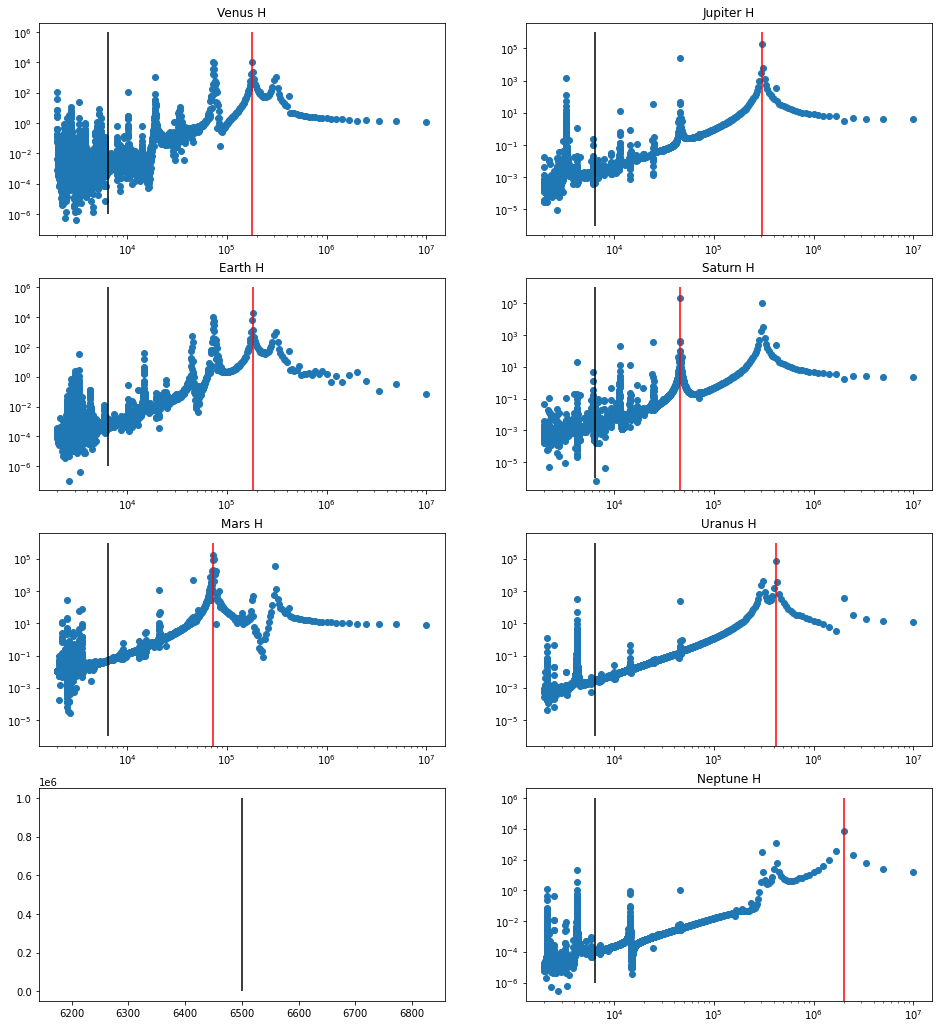

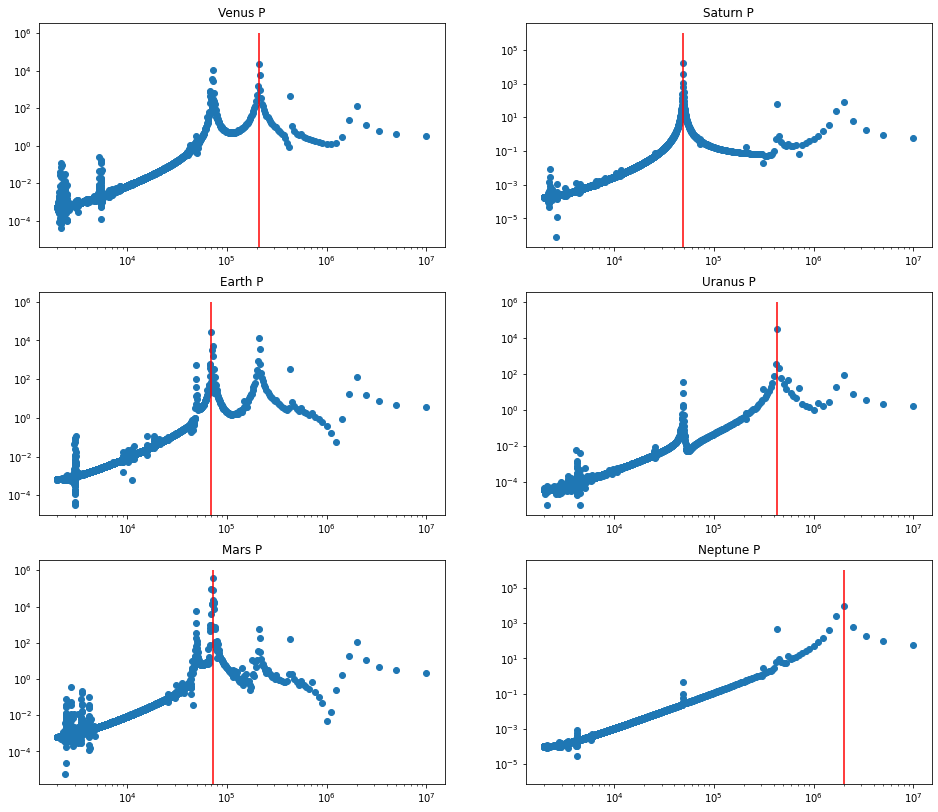

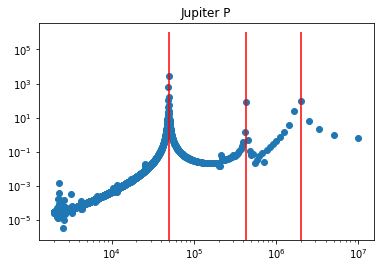

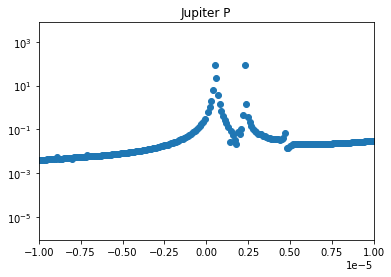

In [2]:

fig,ax = plt.subplots(4,2,figsize=(16,18))
#ax[0].vlines(1/np.array(freq1),int(1e-4),int(1e6))
#ax[0].vlines(700000,int(1e-4),int(1e6),colors='k')
ax[0][0].vlines(-1/np.array([g2]),int(1e-4),int(1e6),colors='r')
#ax[0][0].vlines(1/np.array([g2n]),int(1e-4),int(1e6),colors='b')
ax[0][0].scatter(1/np.flip(freqn[1:]),np.abs(Yhkv[1:])**2)
ax[0][0].set_xscale('log')
ax[0][0].set_yscale('log')
ax[0][0].set_title('Venus H')

ax[1][0].vlines(-1/np.array([g3]),int(1e-4),int(1e6),colors='r')
#ax[1][0].vlines(1/np.array([g3n]),int(1e-4),int(1e6),colors='b')
ax[1][0].scatter(1/np.flip(freqn[1:]),np.abs(Yhke[1:])**2)
ax[1][0].set_xscale('log')
ax[1][0].set_yscale('log')
ax[1][0].set_title('Earth H')

ax[2][0].vlines(-1/np.array([g4]),int(1e-4),int(1e6),colors='r')
#ax[2][0].vlines(1/np.array([g4n]),int(1e-4),int(1e6),colors='b')
ax[2][0].scatter(1/np.flip(freqn[1:]),np.abs(Yhkm[1:])**2)
ax[2][0].set_xscale('log')
ax[2][0].set_yscale('log')
ax[2][0].set_title('Mars H')

ax[0][1].vlines(-1/np.array([g5]),int(1e-4),int(1e6),colors='r')
#ax[0][1].vlines(1/np.array([g5n]),int(1e-4),int(1e6),colors='b')
ax[0][1].scatter(1/np.flip(freqn[1:]),np.abs(Yhkj[1:])**2)
ax[0][1].set_xscale('log')
ax[0][1].set_yscale('log')
ax[0][1].set_title('Jupiter H')

#ax[1].vlines(1/np.array(freq1),int(1e-4),int(1e6))
#ax[1].vlines(700000,int(1e-4),int(1e6),colors='k')
ax[1][1].vlines(-1/np.array([g6]),int(1e-4),int(1e6),colors='r')
#ax[1][1].vlines(1/np.array([g6n]),int(1e-4),int(1e6),colors='b')
ax[1][1].scatter(1/np.flip(freqn[1:]),np.abs(Yhks[1:])**2)
ax[1][1].set_xscale('log')
ax[1][1].set_yscale('log')
ax[1][1].set_title('Saturn H')

#ax[1].vlines(1/np.array(freq1),int(1e-4),int(1e6))
#ax[2].vlines(700000,int(1e-4),int(1e6),colors='k')
ax[2][1].vlines(-1/np.array([g7]),int(1e-4),int(1e6),colors='r')
#ax[2][1].vlines(1/np.array([g7n]),int(1e-4),int(1e6),colors='b')
ax[2][1].scatter(1/np.flip(freqn[1:]),np.abs(Yhku[1:])**2)
ax[2][1].set_xscale('log')
ax[2][1].set_yscale('log')
ax[2][1].set_title('Uranus H')

#ax[1].vlines(1/np.array(freq1),int(1e-4),int(1e6))
#ax[3].vlines(700000,int(1e-4),int(1e6),colors='k')
ax[3][1].vlines(-1/np.array([g8]),int(1e-4),int(1e6),colors='r')
#ax[3][1].vlines(1/np.array([g8n]),int(1e-4),int(1e6),colors='b')
ax[3][1].scatter(1/np.flip(freqn[1:]),np.abs(Yhkn[1:])**2)
ax[3][1].set_xscale('log')
ax[3][1].set_yscale('log')
ax[3][1].set_title('Neptune H')
#pl3.cose()

ax[0][0].vlines(6.5e3,ymin=1e-6,ymax=1e6,colors='k')
ax[1][0].vlines(6.5e3,ymin=1e-6,ymax=1e6,colors='k')
ax[2][0].vlines(6.5e3,ymin=1e-6,ymax=1e6,colors='k')
ax[3][0].vlines(6.5e3,ymin=1e-6,ymax=1e6,colors='k')
ax[0][1].vlines(6.5e3,ymin=1e-6,ymax=1e6,colors='k')
ax[1][1].vlines(6.5e3,ymin=1e-6,ymax=1e6,colors='k')
ax[2][1].vlines(6.5e3,ymin=1e-6,ymax=1e6,colors='k')
ax[3][1].vlines(6.5e3,ymin=1e-6,ymax=1e6,colors='k')

fig,ax = plt.subplots(3,2,figsize=(16,14))

#ax[1].vlines(1/np.array(freq1),int(1e-4),int(1e6))
ax[0][0].vlines(1/np.array([abs(s2)]),int(1e-4),int(1e6),colors='r')
#ax[0][0].vlines(1/np.array([abs(s2n)]),int(1e-4),int(1e6),colors='b')
#ax[0].vlines(int(2.35e6),int(1e-4),int(1e6),colors='k')
ax[0][0].scatter(1/(freqn[1:]),np.abs(Ypqv[1:])**2)
ax[0][0].set_title('Venus P')
ax[0][0].set_xscale('log')
ax[0][0].set_yscale('log')

#ax[1].vlines(1/np.array(freq1),int(1e-4),int(1e6))
ax[1][0].vlines(1/np.array([abs(s3)]),int(1e-4),int(1e6),colors='r')
#ax[1][0].vlines(1/np.array([abs(s3n)]),int(1e-4),int(1e6),colors='b')
#ax[1].vlines(int(2.35e6),int(1e-4),int(1e6),colors='k')
ax[1][0].scatter(1/(freqn[1:]),np.abs(Ypqe[1:])**2)
ax[1][0].set_xscale('log')
ax[1][0].set_title('Earth P')
ax[1][0].set_yscale('log')

#ax[1].vlines(1/np.array(freq1),int(1e-4),int(1e6))
ax[2][0].vlines(1/np.array([abs(s4)]),int(1e-4),int(1e6),colors='r')
#ax[2][0].vlines(1/np.array([abs(s4n)]),int(1e-4),int(1e6),colors='b')
ax[2][0].scatter(1/(freqn[1:]),np.abs(Ypqm[1:])**2)
#ax[2].vlines(int(2.35e6),int(1e-4),int(1e6),colors='k')
ax[2][0].set_xscale('log')
ax[2][0].set_yscale('log')
ax[2][0].set_title('Mars P')

#ax[1].vlines(1/np.array(freq1),int(1e-4),int(1e6))
ax[0][1].vlines(1/np.array([abs(s6)]),int(1e-4),int(1e6),colors='r')
#ax[0][1].vlines(1/np.array([abs(s6n)]),int(1e-4),int(1e6),colors='b')
#ax[0].vlines(int(2.35e6),int(1e-4),int(1e6),colors='k')
ax[0][1].scatter(1/(freqn[1:]),np.abs(Ypqs[1:])**2)
ax[0][1].set_xscale('log')
ax[0][1].set_yscale('log')
ax[0][1].set_title('Saturn P')

#ax[1].vlines(1/np.array(freq1),int(1e-4),int(1e6))
ax[1][1].vlines(1/np.array([abs(s7)]),int(1e-4),int(1e6),colors='r')
#ax[1][1].vlines(1/np.array([abs(s7n)]),int(1e-4),int(1e6),colors='b')
#ax[1].vlines(int(2.35e6),int(1e-4),int(1e6),colors='k')
ax[1][1].scatter(1/(freqn[1:]),np.abs(Ypqu[1:])**2)
ax[1][1].set_xscale('log')
ax[1][1].set_yscale('log')
ax[1][1].set_title('Uranus P')

#ax[1].vlines(1/np.array(freq1),int(1e-4),int(1e6))
ax[2][1].vlines(1/np.array([abs(s8)]),int(1e-4),int(1e6),colors='r')
#ax[2][1].vlines(1/np.array([abs(s8n)]),int(1e-4),int(1e6),colors='b')
ax[2][1].scatter(1/(freqn[1:]),np.abs(Ypqn[1:])**2)
#ax[2].vlines(int(2.35e6),int(1e-4),int(1e6),colors='k')
ax[2][1].set_xscale('log')
ax[2][1].set_yscale('log')
ax[2][1].set_title('Neptune P')
plt.show()
plt.vlines(1/np.array([abs(s6),abs(s7),abs(s8)]),int(1e-4),int(1e6),colors='r')
#ax[0][1].vlines(1/np.array([abs(s6n)]),int(1e-4),int(1e6),colors='b')
#ax[0].vlines(int(2.35e6),int(1e-4),int(1e6),colors='k')
plt.scatter(1/(freqn[1:]),np.abs(Ypqj[1:])**2)
plt.xscale('log')
plt.yscale('log')
plt.title('Jupiter P')
plt.show()

plt.scatter((freqn[1:]),np.abs(Ypqj[1:])**2)
#plt.xscale('log')
plt.yscale('log')
plt.xlim(-0.000025,0.000025)
plt.xlim(-0.00001,0.00001)
plt.title('Jupiter P')
plt.show()
#plt.close()


ax[0][0].vlines(6.5e3,ymin=1e-6,ymax=1e6,colors='k')
ax[1][0].vlines(6.5e3,ymin=1e-6,ymax=1e6,colors='k')
ax[2][0].vlines(6.5e3,ymin=1e-6,ymax=1e6,colors='k')
ax[0][1].vlines(6.5e3,ymin=1e-6,ymax=1e6,colors='k')
ax[1][1].vlines(6.5e3,ymin=1e-6,ymax=1e6,colors='k')
ax[2][1].vlines(6.5e3,ymin=1e-6,ymax=1e6,colors='k')

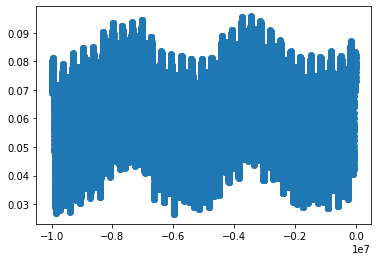

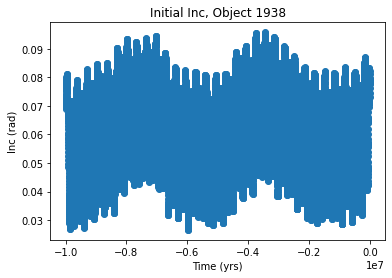

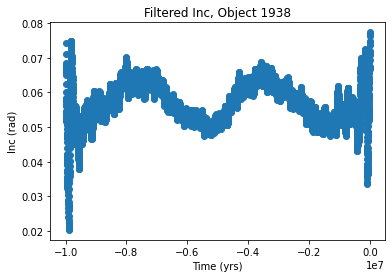

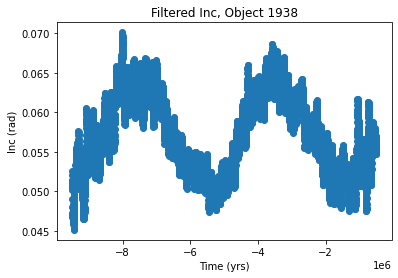

0.05721718162299454
0.05677987124710907
0.05690287032196452
0.056617520095677505


In [4]:
plt.scatter(t_init,inc_init)
plt.show()

pc5 = int(len(t_init)*0.05)
plt.scatter(t_init,inc_init)
plt.title('Initial Inc, Object 1938')
plt.ylabel('Inc (rad)')
plt.xlabel('Time (yrs)')
plt.show()
plt.scatter(t_init,np.arcsin(sini_f))
plt.title('Filtered Inc, Object 1938')
plt.ylabel('Inc (rad)')
plt.xlabel('Time (yrs)')
plt.show()
plt.scatter(t_init[pc5:-pc5],sini_f[pc5:-pc5])
plt.title('Filtered Inc, Object 1938')
plt.ylabel('Inc (rad)')
plt.xlabel('Time (yrs)')
plt.show()

#plt.scatter(t_init,np.fft.ifft(Ypq))
#plt.show()
#plt.scatter(t_init,np.fft.ifft(Ypq_f))
#plt.show()

#plt.scatter(t_init[pc5:-pc5],sini_f[pc5:-pc5])
#plt.show()
print(np.mean(sini_f[pc5:-pc5]))
print(np.mean(sini_f))
print(np.median(sini_f[pc5:-pc5]))
print(np.median(sini_f))

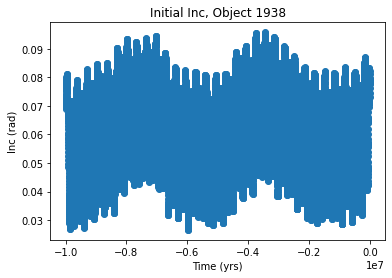

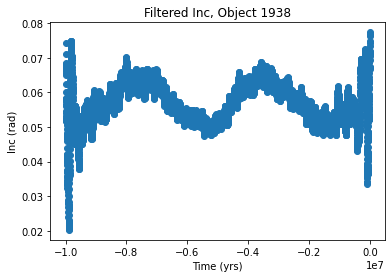

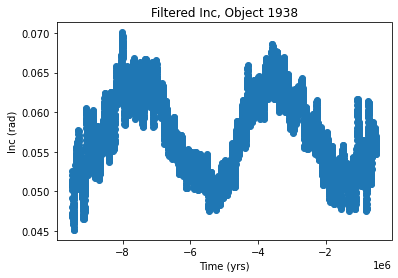

0.05721723086912359
0.056779941138726225
0.0569009486840168
0.0566216875782703


In [6]:
pc5 = int(len(t_init)*0.05)
plt.scatter(t_init,inc_init)
plt.title('Initial Inc, Object 1938')
plt.ylabel('Inc (rad)')
plt.xlabel('Time (yrs)')
plt.show()
plt.scatter(t_init,np.arcsin(sini_f))
plt.title('Filtered Inc, Object 1938')
plt.ylabel('Inc (rad)')
plt.xlabel('Time (yrs)')
plt.show()
plt.scatter(t_init[pc5:-pc5],sini_f[pc5:-pc5])
plt.title('Filtered Inc, Object 1938')
plt.ylabel('Inc (rad)')
plt.xlabel('Time (yrs)')
plt.show()

#plt.scatter(t_init,np.fft.ifft(Ypq))
#plt.show()
#plt.scatter(t_init,np.fft.ifft(Ypq_f))
#plt.show()

#plt.scatter(t_init[pc5:-pc5],sini_f[pc5:-pc5])
#plt.show()
print(np.mean(sini_f[pc5:-pc5]))
print(np.mean(sini_f))
print(np.median(sini_f[pc5:-pc5]))
print(np.median(sini_f))